PROBLEM STATEMENT 11

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv('Sales Dataset.csv')

# Ensure the correct column names
print(df.columns)

# Filter data by gender
male_purchase = df[df['Gender'] == 'Male']['PurchaseAmount']
female_purchase = df[df['Gender'] == 'Female']['PurchaseAmount']

# Perform t-test
t_stat, p_value = ttest_ind(male_purchase, female_purchase)

print('T-statistic:', t_stat)
print('P-value:', p_value)


Index(['Unnamed: 0', 'CustomerID', 'Age', 'Gender', 'Location',
       'ProductCategory', 'PurchaseDate', 'PurchaseAmount', 'PaymentMethod',
       'Quantity', 'DiscountPercentage', 'IsReturned', 'Rating', 'IsPromotion',
       'CustomerSegment', 'ShippingDuration', 'Region', 'IngestionTimestamp',
       'Source', 'Month'],
      dtype='object')
T-statistic: -1.0745905731187595
P-value: 0.28281780608324525


PROBLEM STATEMENT 12

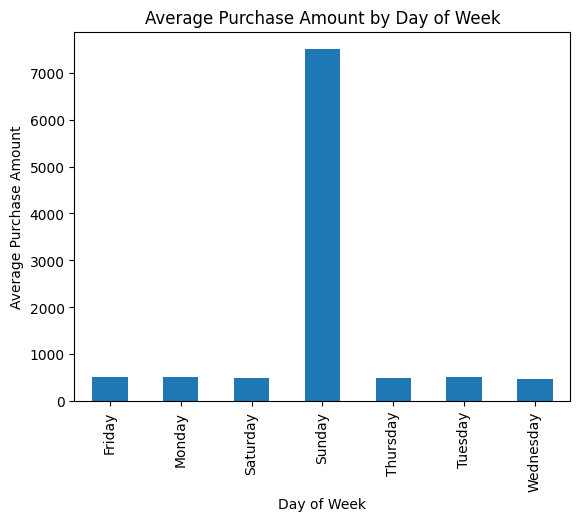

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Sales Dataset.csv')

# Convert 'PurchaseDate' to datetime and extract day of the week
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

# Calculate average purchase amount by day of the week
avg_purchase_by_day = df.groupby('DayOfWeek')['PurchaseAmount'].mean()

# Plot
avg_purchase_by_day.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Day of Week')
plt.show()


PROBLEM STATEMENT 16

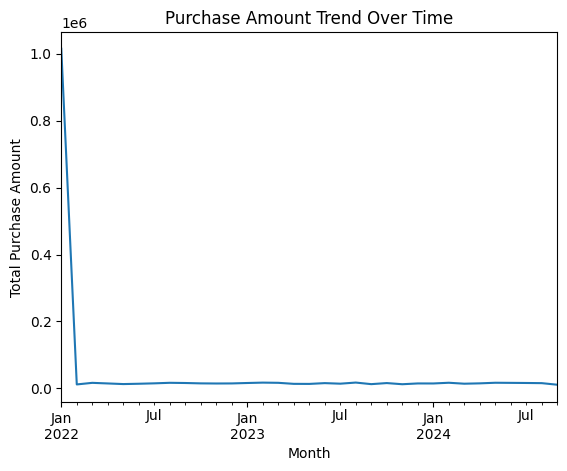

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Sales Dataset.csv')

# Convert 'PurchaseDate' to datetime and extract month
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['Month'] = df['PurchaseDate'].dt.to_period('M')

# Calculate total purchase amount by month
monthly_purchase = df.groupby('Month')['PurchaseAmount'].sum()

# Plot
monthly_purchase.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.title('Purchase Amount Trend Over Time')
plt.show()


PROBLEM STATEMENT 17

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Gender', 'Location',
       'ProductCategory', 'PurchaseDate', 'PurchaseAmount', 'PaymentMethod',
       'Quantity', 'DiscountPercentage', 'IsReturned', 'Rating', 'IsPromotion',
       'CustomerSegment', 'ShippingDuration', 'Region', 'IngestionTimestamp',
       'Source', 'Month'],
      dtype='object')


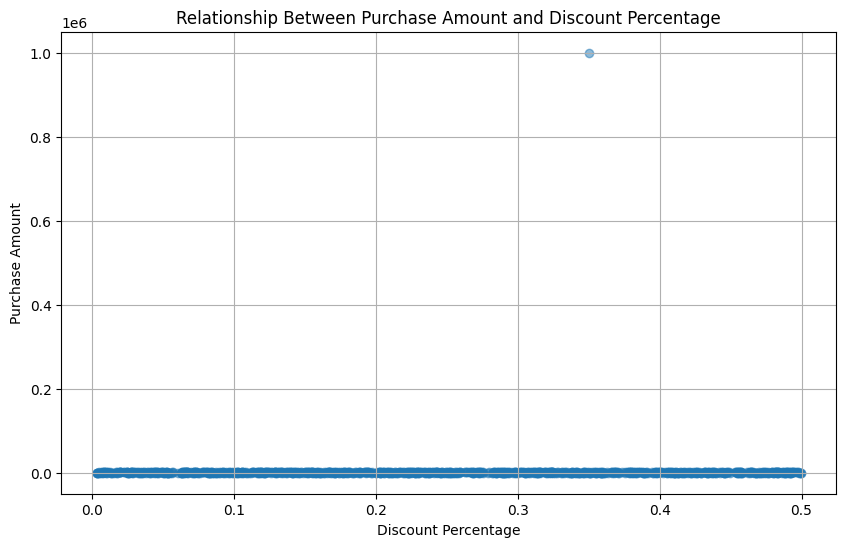

Correlation between Purchase Amount and Discount Percentage: 0.02155723160126537


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Sales Dataset.csv')

# Display column names to confirm they match
print(df.columns)

# Assuming 'PurchaseAmount' and 'DiscountPercentage' are the correct column names
purchase_amount_column = 'PurchaseAmount'  # Update if your column name is different
discount_column = 'DiscountPercentage'  # Update if your column name is different

# Check if the columns exist
if purchase_amount_column not in df.columns or discount_column not in df.columns:
    raise KeyError(f"One or both columns '{purchase_amount_column}' and '{discount_column}' do not exist in the dataset.")

# Scatter plot for PurchaseAmount vs DiscountPercentage
plt.figure(figsize=(10, 6))
plt.scatter(df[discount_column], df[purchase_amount_column], alpha=0.5)
plt.title('Relationship Between Purchase Amount and Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.show()

# Calculate the correlation between PurchaseAmount and DiscountPercentage
correlation = df[purchase_amount_column].corr(df[discount_column])
print(f"Correlation between Purchase Amount and Discount Percentage: {correlation}")


PROBLEM STATEMENT 18

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Sales Dataset.csv')

# Convert 'PurchaseDate' to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Identify multiple purchases on the same day
df['SameDayPurchase'] = df.duplicated(subset=['CustomerID', 'PurchaseDate'], keep=False)

# Count of same day purchases
same_day_purchase_counts = df['SameDayPurchase'].value_counts()

print(same_day_purchase_counts)


SameDayPurchase
False    997
True       3
Name: count, dtype: int64


PROBLEM STATEMENT 19

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Sales Dataset.csv')

# Create pivot table
pivot_table = df.pivot_table(values='PurchaseAmount', index='CustomerSegment', columns='ProductCategory', aggfunc='sum', fill_value=0)

print(pivot_table)


ProductCategory       Clothing    Electronics  Home Appliances
CustomerSegment                                               
New               60325.098181   70446.097719     6.896863e+04
Returning        100688.639368  107753.209241     1.093207e+06


PROBLEM STATEMENT 20

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('Sales Dataset.csv')

# Calculate average purchase amount per customer for each region
avg_purchase_per_customer = df.groupby(['Region', 'CustomerID'])['PurchaseAmount'].mean().reset_index()

# Calculate overall average per region
avg_purchase_per_region = avg_purchase_per_customer.groupby('Region')['PurchaseAmount'].mean().reset_index()

# Sort and get top 5 regions
top_5_regions = avg_purchase_per_region.sort_values(by='PurchaseAmount', ascending=False).head(5)

print(top_5_regions)


  Region  PurchaseAmount
0   East     4695.210752
2  South      543.472560
1  North      522.815889
3   West      462.694022
